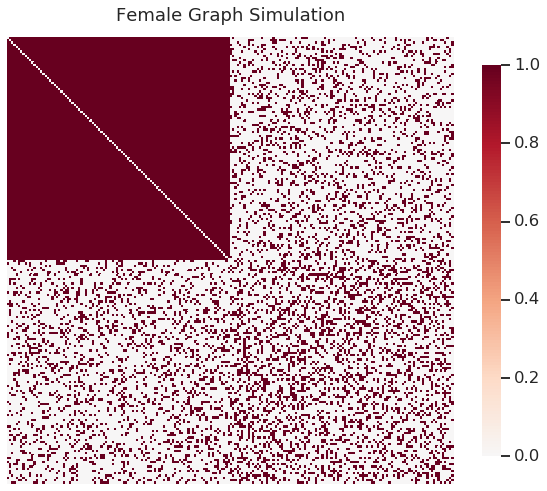

<Figure size 432x288 with 0 Axes>

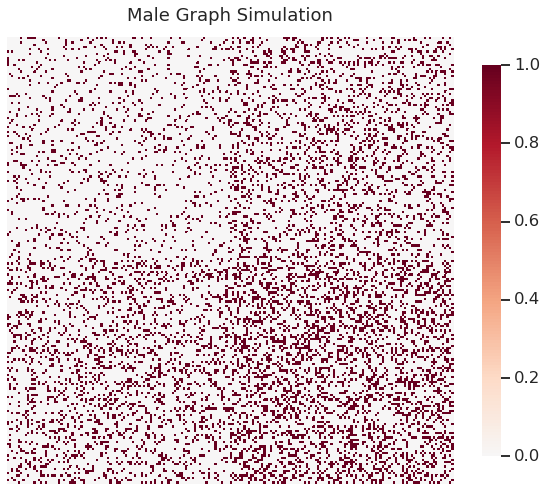

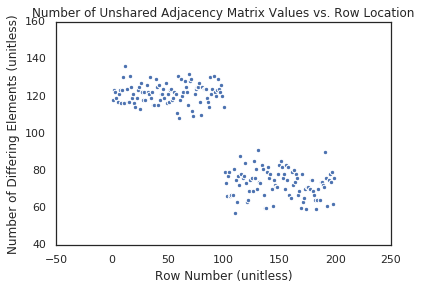

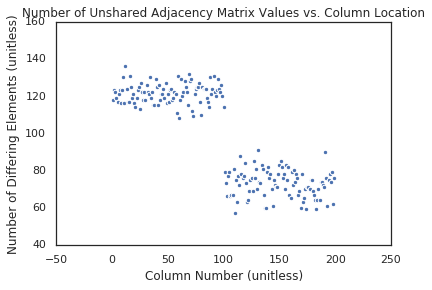

In [260]:
import graspy
from mgcpy.independence_tests.mgc import MGC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from graspy.simulations import sbm
np.random.seed(10)

#Generating simulation/test data
male = {}
female = {}

#This creates dictionaries of test data
for i in range(1,101):
    n = [100, 100]
    p_male = [[0.1, 0.2], 
              [0.2, 0.3]]
    male["male{0}".format(i - 1)] = sbm(n=n, p=p_male)
    p_female = [[1.0, 0.2], 
                [0.2, 0.3]]
    female["female{0}".format(i - 1)] = sbm(n=n, p=p_female)

male.update(female)
    
#Plot
from graspy.plot import heatmap

heatmap(female["female1"], title='Female Graph Simulation')

plt.figure()
heatmap(male["male1"], title='Male Graph Simulation')

test_female = female["female1"]
test_male = male["male1"]

y = [0]*100 + [1]*100

def iterative_screen(a_dict, a_matrix, y_labels, c):

    '''
    Performs iterative screening on graphs.

    Parameters

    ----------
    
    a_dict: the dictionary of adjacency matrices are going to be used for signal subgraph.

    a_matrix: one of the adjacency matrices in the dictionary
    
    y_labels: the vector of labels.
    
    c: the correlation threshold value.

    Returns

    -------

    x_nonit_SS: the signal subgraph of a_matrix, found through non-iterative

    vertex screening.
    '''
    mgc = MGC()
    S_hat = np.zeros((len(a_matrix),1))
    for i in range(len(a_matrix)):
      mat_hat = np.zeros((len(a_dict),len(a_matrix[i])))
      for j in range(len(a_dict)):
        if j < 100:
          mat = a_dict["male{0}".format(j)]
        else:
          mat = a_dict["female{0}".format(j - 100)]
        mat_hat[j] = mat[i]
      c_u, independence_test_metadata = mgc.test_statistic(mat_hat.reshape(len(a_dict),len(a_matrix[0])), y_labels)
      S_hat[i][0] = c_u
      
    S_hat = np.absolute(S_hat)
    values_flags = np.nonzero(S_hat > c)    
    print(values_flags)

    
def simple_class_SS(a_matrix_1, a_matrix_2):
    SS = []
    for i in range(len(a_matrix_1)):
        for j in range(len(a_matrix_1)):
            if a_matrix_1[i][j] != a_matrix_2[i][j]:
                SS.append([i + 1,j + 1])
    SS.sort()
    return SS

vals = simple_class_SS(test_female, test_male)
x = [x[0] for x in vals]
y = [x[1] for x in vals]
plt.figure()
plt.title("Number of Unshared Adjacency Matrix Values vs. Row Location")
plt.xlabel("Row Number (unitless)")
plt.ylabel("Number of Differing Elements (unitless)")
for i in range(1,len(test_female)):
    plt.scatter(i,x.count(i))

plt.figure()
plt.xlabel("Column Number (unitless)")
plt.ylabel("Number of Differing Elements (unitless)")
plt.title("Number of Unshared Adjacency Matrix Values vs. Column Location")
for i in range(1,len(test_female)):
    plt.scatter(i,y.count(i))

In [262]:
y_test = [0]*100 + [1]*100
y_test = np.asarray(y_test).reshape(200,1)
y_test = y_test.astype(float)
c = 0.90
iterative_screen(male, test_female, y_test, c)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

In [254]:
print(male)

{'male0': array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'male1': array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]]), 'male2': array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]]), 'male3': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.